In [ ]:
# Part 1: Feature Extraction

In [ ]:
!nvidia-smi

Mon Jun 26 19:08:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-26 19:08:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 108.177.112.128, 172.217.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   162MB/s    in 1.0s    

2023-06-26 19:08:17 (162 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
!unzip 10_food_classes_10_percent.zip

Archive:  10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_wings  
   creating: 10_food_classes_10_per

In [ ]:
import os

def visualize_files(path):
  for path, dirs, files in os.walk(path):
    if dirs:
      print(f"There are {len(dirs)} directories named {dirs}")
      for directory in dirs:
        d = os.path.join(path, directory)
        f = len(os.listdir(d))
        print(f"{directory} has {f} files")


In [ ]:
visualize_files('/content/10_food_classes_10_percent/train')

There are 10 directories named ['fried_rice', 'steak', 'pizza', 'chicken_curry', 'hamburger', 'grilled_salmon', 'ramen', 'chicken_wings', 'ice_cream', 'sushi']
fried_rice has 75 files
steak has 75 files
pizza has 75 files
chicken_curry has 75 files
hamburger has 75 files
grilled_salmon has 75 files
ramen has 75 files
chicken_wings has 75 files
ice_cream has 75 files
sushi has 75 files


In [ ]:
visualize_files('/content/10_food_classes_10_percent/test')

There are 10 directories named ['fried_rice', 'steak', 'pizza', 'chicken_curry', 'hamburger', 'grilled_salmon', 'ramen', 'chicken_wings', 'ice_cream', 'sushi']
fried_rice has 250 files
steak has 250 files
pizza has 250 files
chicken_curry has 250 files
hamburger has 250 files
grilled_salmon has 250 files
ramen has 250 files
chicken_wings has 250 files
ice_cream has 250 files
sushi has 250 files


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32
CLASS = 'categorical'

test_dir = '/content/10_food_classes_10_percent/test'
train_dir = '/content/10_food_classes_10_percent/train'

In [ ]:
generator = ImageDataGenerator(rescale=1./255)
train_data = generator.flow_from_directory(train_dir,
                                           target_size=IMAGE_SHAPE,
                                           batch_size=BATCH_SIZE,
                                           class_mode=CLASS,)
test_data = generator.flow_from_directory(test_dir,
                                           target_size=IMAGE_SHAPE,
                                           batch_size=BATCH_SIZE,
                                           class_mode=CLASS,)


Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# create TensorBoard callback
import datetime
import tensorflow as tf
def create_tensorboar_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saved files at {log_dir}")
  return tensorboard_callback

In [ ]:
!pip install --upgrade tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_hub as hub

In [ ]:
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
def create_model(model_url, num_classes):
  feature_extractor_layer = hub.KerasLayer(model_url,trainable=False,
                                          name='feature_extraction_layer',
                                          input_shape=IMAGE_SHAPE+(3,))
  model = tf.keras.models.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation='softmax')
  ])
  return model


In [ ]:
resnet_model = create_model(resnet_url, 10)

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
efficient_model = create_model(efficientnet_url, 10)

In [ ]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=Adam(),
                     metrics=['accuracy'])

In [ ]:
resnet_hist = resnet_model.fit(train_data,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data),
                 epochs=5,
                               callbacks=[create_tensorboar_callback(dir_name='tf_hub',
                                                                     experiment_name='resnet')])

Saved files at tf_hub/resnet/20230626-201657
Epoch 1/5
24/24 [==============================] - 20s 811ms/step - loss: 0.1379 - accuracy: 0.9907 - val_loss: 0.6235 - val_accuracy: 0.7832
Epoch 2/5
24/24 [==============================] - 20s 862ms/step - loss: 0.1211 - accuracy: 0.9947 - val_loss: 0.6223 - val_accuracy: 0.7860
Epoch 3/5
24/24 [==============================] - 18s 791ms/step - loss: 0.1078 - accuracy: 0.9947 - val_loss: 0.6199 - val_accuracy: 0.7868
Epoch 4/5
24/24 [==============================] - 18s 786ms/step - loss: 0.0955 - accuracy: 0.9973 - val_loss: 0.6221 - val_accuracy: 0.7876
Epoch 5/5
24/24 [==============================] - 18s 771ms/step - loss: 0.0861 - accuracy: 0.9987 - val_loss: 0.6236 - val_accuracy: 0.7892


In [ ]:
efficient_model.compile(loss="categorical_crossentropy",
                     optimizer=Adam(),
                     metrics=['accuracy'])

In [ ]:
efficient_hist = efficient_model.fit(train_data,
                 steps_per_epoch=len(train_data),
                 validation_data=test_data,
                 validation_steps=len(test_data),
                 epochs=5,
                                     callbacks=[create_tensorboar_callback(dir_name='tf_hub',
                                                                     experiment_name='efficient_net')])

Saved files at tf_hub/efficient_net/20230626-201837
Epoch 1/5
24/24 [==============================] - 19s 755ms/step - loss: 0.4360 - accuracy: 0.9067 - val_loss: 0.5155 - val_accuracy: 0.8612
Epoch 2/5
24/24 [==============================] - 19s 797ms/step - loss: 0.3805 - accuracy: 0.9253 - val_loss: 0.4932 - val_accuracy: 0.8644
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.3400 - accuracy: 0.9333 - val_loss: 0.4731 - val_accuracy: 0.8692
Epoch 4/5
24/24 [==============================] - 25s 1s/step - loss: 0.3068 - accuracy: 0.9480 - val_loss: 0.4582 - val_accuracy: 0.8716
Epoch 5/5
24/24 [==============================] - 18s 776ms/step - loss: 0.2761 - accuracy: 0.9533 - val_loss: 0.4449 - val_accuracy: 0.8740


In [ ]:
!wget http://images.huffingtonpost.com/2015-05-31-1433051788-945248-Thaicoconut.JPG

--2023-06-26 19:44:29--  http://images.huffingtonpost.com/2015-05-31-1433051788-945248-Thaicoconut.JPG
Resolving images.huffingtonpost.com (images.huffingtonpost.com)... 151.101.2.114, 151.101.66.114, 151.101.130.114, ...
Connecting to images.huffingtonpost.com (images.huffingtonpost.com)|151.101.2.114|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://images.huffingtonpost.com/2015-05-31-1433051788-945248-Thaicoconut.JPG [following]
--2023-06-26 19:44:29--  https://images.huffingtonpost.com/2015-05-31-1433051788-945248-Thaicoconut.JPG
Connecting to images.huffingtonpost.com (images.huffingtonpost.com)|151.101.2.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2358548 (2.2M) [image/jpeg]
Saving to: ‘2015-05-31-1433051788-945248-Thaicoconut.JPG’

2015-05-31-14330517 100%[===================>]   2.25M  --.-KB/s    in 0.07s   

2023-06-26 19:44:30 (33.9 MB/s) - ‘2015-05-31-1433051788-945248-Thaicoconut.JPG’ saved 

In [ ]:
def preprocess_image(image):
  image = tf.io.read_file(image)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image, size=[224, 224])
  image = image / 255.
  image = tf.expand_dims(image, axis=0)
  return image

In [ ]:
image = preprocess_image('/content/2015-05-31-1433051788-945248-Thaicoconut.JPG')

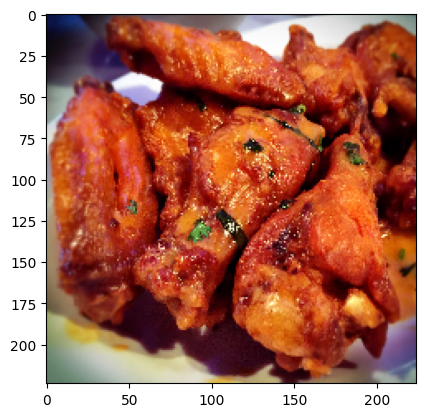

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(tf.squeeze(image))

In [ ]:
class_names = ['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger',
               'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']

In [ ]:
import numpy as np
class_names[np.argmax(np.ravel(resnet_model.predict(image)))]

1/1 [==============================] - 0s 25ms/step


'chicken_wings'

In [ ]:
class_names[np.argmax(np.ravel(efficient_model.predict(image)))]

1/1 [==============================] - 2s 2s/step


'chicken_wings'

In [ ]:
def plot_loss_curves(hist):
  epochs = range(len(hist['val_loss']))
  plt.plot(epochs, hist['loss'], label='training_loss')
  plt.plot(epochs, hist['val_loss'], label='validation_loss')
  plt.legend()
  plt.show()

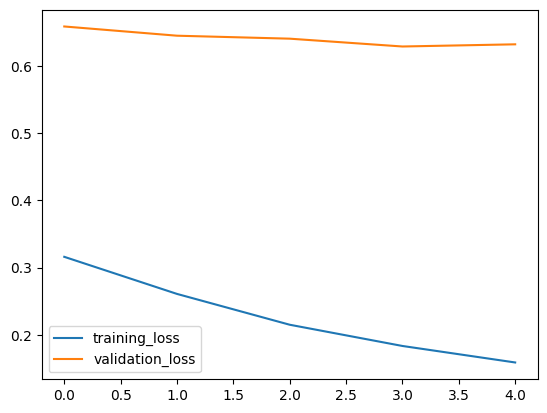

In [ ]:
plot_loss_curves(resnet_hist.history)

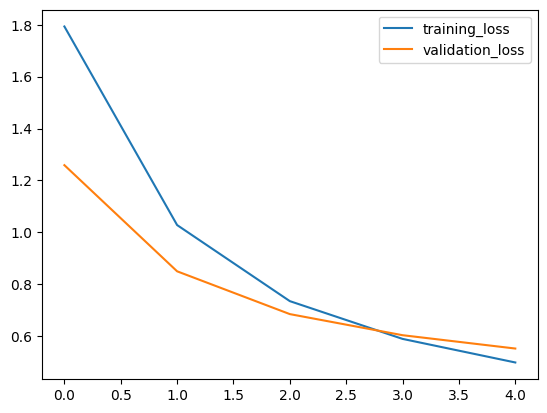

In [ ]:
plot_loss_curves(efficient_hist.history)


In [ ]:
def plot_accuracy_curves(hist):
  epochs = range(len(hist['val_loss']))
  plt.plot(epochs, hist['accuracy'], label='training_accuracy')
  plt.plot(epochs, hist['val_accuracy'], label='validation_accuracy')
  plt.legend()
  plt.show()

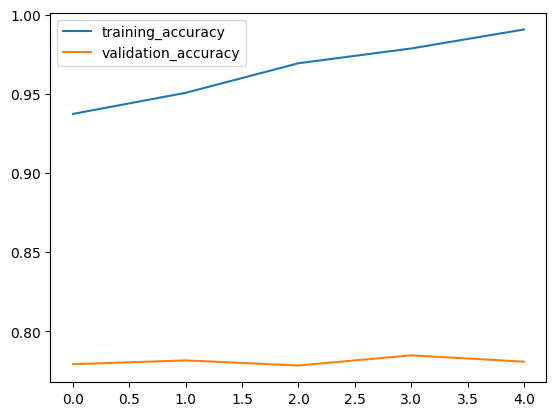

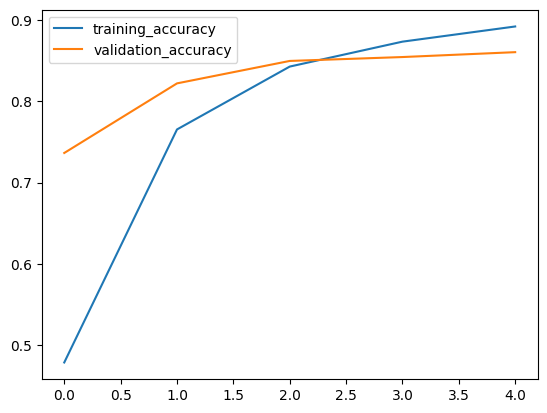

In [ ]:
plot_accuracy_curves(resnet_hist.history)
plot_accuracy_curves(efficient_hist.history)

In [ ]:
!tensorboard dev upload --logdir /content/tf_hub

2023-06-26 20:23:12.153640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/tf_hub

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   XJYB-BCZM


Upload started and will continue reading any new data as it's added to the logdir